In [222]:
import pandas as pd
import numpy as np
import itertools as it

from collections import Counter

from itertools import compress

import pickle as pcl

from scipy.spatial.distance import cdist

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.cm as cm

import brewer2mpl

# Get "Set2" colors from ColorBrewer (all colorbrewer scales: http://bl.ocks.org/mbostock/5577023)
set2 = brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors

from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import MeanShift

import warnings

In [2]:
import hightolowz

In [3]:
%run load_wmap1.py

#z6_density_select_groupinfo = pd.read_csv('data/wmap1/z6_density_select_groupinfo.csv')

In [38]:
protoclusters_20, pc_members_20 = pcl.load(open('data/wmap1/protoclusters_r20.p', 'rb'))
protoclusters_15, pc_members_15 = pcl.load(open('data/wmap1/protoclusters_r15.p', 'rb'))
protoclusters_10, pc_members_10 = pcl.load(open('data/wmap1/protoclusters_r10.p', 'rb'))

In [5]:
#z0_halos_20, halo_ratio_20 = hightolowz.z0_halo_properties(protoclusters_20, pc_members_20, z6_galaxies_mstar)
#z0_halos_15, halo_ratio_15 = hightolowz.z0_halo_properties(protoclusters_15, pc_members_15, z6_galaxies_mstar)
#z0_halos_10, halo_ratio_10 = hightolowz.z0_halo_properties(protoclusters_10, pc_members_10, z6_galaxies_mstar)

In [6]:
dat_z0top = pd.read_csv('data/wmap1/wmap1_z0select_subhalos.csv', skiprows=98, skipfooter=1, engine='python')

Number of protocluster canididates for each search

In [7]:
print "20 Mpc: ", len(pc_members_20)
print "15 Mpc: ", len(pc_members_15)
print "10 Mpc: ", len(pc_members_10)

20 Mpc:  1270
15 Mpc:  2798
10 Mpc:  8187


Number of protocluster candidates with $\delta_{gal} > 0$

In [8]:
print "20 Mpc: ", sum(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'] > 0.)
print "15 Mpc: ", sum(z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'] > 0.)
print "10 Mpc: ", sum(z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'] > 0.)

20 Mpc:  964
15 Mpc:  2078
10 Mpc:  6139


Fraction of galaxies assigned to protoclusters

In [9]:
print "20 Mpc: ", float(sum([len(x[0]) for x in pc_members_20])) / len(z6_galaxies_mstar)
print "15 Mpc: ", float(sum([len(x[0]) for x in pc_members_15])) / len(z6_galaxies_mstar)
print "10 Mpc: ", float(sum([len(x[0]) for x in pc_members_10])) / len(z6_galaxies_mstar)

20 Mpc:  0.525766047484
15 Mpc:  0.544569262929
10 Mpc:  0.575010621845


In [10]:
len(np.unique(dat_z0top[dat_z0top['z0_haloId'] == dat_z0top['z0_firstHaloInFOFgroupId']]['z0_haloId']))

1938

Filter protocluster candidates by those with $\delta_{gal} > \delta_{lim}$

In [11]:
delta_lim = 0.25

overdense_10 = z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'] > delta_lim
overdense_15 = z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'] > delta_lim
overdense_20 = z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'] > delta_lim

In [12]:
print "N overdense: ", sum(overdense_10) , "/ ", len(overdense_10), ", %: ", \
round(float(sum(overdense_10)) / len(overdense_10), 3)

print "N overdense: ", sum(overdense_15) , "/ ", len(overdense_15), ", %: ", \
round(float(sum(overdense_15)) / len(overdense_15), 3)

print "N overdense: ", sum(overdense_20) , "/ ", len(overdense_20), ", %: ", \
round(float(sum(overdense_20)) / len(overdense_20), 3)

N overdense:  5220 /  8187 , %:  0.638
N overdense:  1741 /  2798 , %:  0.622
N overdense:  767 /  1270 , %:  0.604


In [246]:
pc_members_10 = list(compress(pc_members_10, overdense_10))
pc_members_15 = list(compress(pc_members_15, overdense_15))
pc_members_20 = list(compress(pc_members_20, overdense_20))

In [247]:
protoclusters_10 = list(compress(protoclusters_10, overdense_10))
protoclusters_15 = list(compress(protoclusters_15, overdense_15))
protoclusters_20 = list(compress(protoclusters_20, overdense_20))

Do a match for a single $z=0$ cluster

Match id:  873
N (matched galaxies):  17
N (candidate galaxies):  68
N (protocluster galaxies above detection threshold):  21
Completeness:  0.81
Purity:  0.25
Protocluster z=0 halo mass:  14.2113262349


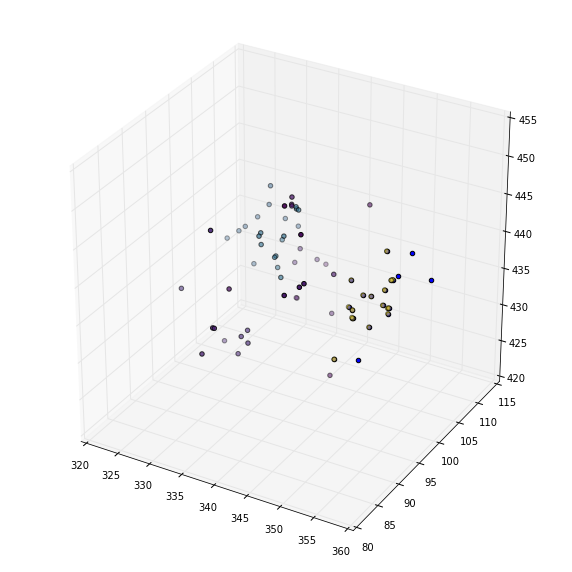

In [243]:
pc_members = pc_members_15

cluster_id = np.unique(dat_z0top[dat_z0top['z0_haloId'] == dat_z0top['z0_firstHaloInFOFgroupId']]['z0_haloId'])[1200]

for i, mems in enumerate(pc_members):
    
    match = sum(np.in1d(z6_galaxies_mstar.ix[mems[0]]['z0_centralId'], cluster_id))
    
    if match > 0:
        match_id = i
        
        print "Match id: ", match_id
        print "N (matched galaxies): ", match
        
        print "N (candidate galaxies): ", len(pc_members[match_id][0])
        print "N (protocluster galaxies above detection threshold): ", sum(dat_z0top[dat_z0top['z0_firstHaloInFOFgroupId'] == cluster_id]['z6_stellarMass'] > 0.1)
        
        print "Completeness: ", round(float(match) / sum(dat_z0top[dat_z0top['z0_firstHaloInFOFgroupId'] == cluster_id]['z6_stellarMass'] > 0.1), 2)
        print "Purity: ", round(float(match) / len(pc_members[match_id][0]), 2)
        
        print "Protocluster z=0 halo mass: ", np.log10(dat_z0top[dat_z0top['z0_haloId'] == cluster_id]['z0_m_crit200'].iloc[0] * 1e10)

        
        # plot protocluster and selection
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(z6_galaxies_mstar.ix[pc_members[match_id][0]]['z6_x'],
                   z6_galaxies_mstar.ix[pc_members[match_id][0]]['z6_y'],
                   zs=z6_galaxies_mstar.ix[pc_members[match_id][0]]['z6_z'], depthshade=True,
                   c=z6_galaxies_mstar.ix[pc_members[match_id][0]]['z0_centralMvir'], cmap='viridis')

        ax.scatter(dat_z0top[(dat_z0top['z0_firstHaloInFOFgroupId'] == cluster_id) & (dat_z0top['z6_stellarMass'] > 0.1)]['z6_x'],
                   dat_z0top[(dat_z0top['z0_firstHaloInFOFgroupId'] == cluster_id) & (dat_z0top['z6_stellarMass'] > 0.1)]['z6_y'],
                   zs=dat_z0top[(dat_z0top['z0_firstHaloInFOFgroupId'] == cluster_id) & (dat_z0top['z6_stellarMass'] > 0.1)]['z6_z'],
                   depthshade=False, c='blue')


## Assess match

In [290]:
warnings.filterwarnings('ignore')

N_clusters = np.unique(dat_z0top[dat_z0top['z0_haloId'] == dat_z0top['z0_firstHaloInFOFgroupId']]['z0_haloId']).shape[0]

TP = z6_galaxies_mstar.ix[protoclusters_20][(z6_galaxies_mstar.ix[protoclusters_20]['max_fraction_20'] > 0.5) \
                                       & (z6_galaxies_mstar.ix[protoclusters_20]['max_fraction_mass_20'] > 1e4)].shape[0]

FP = z6_galaxies_mstar.ix[protoclusters_20][(z6_galaxies_mstar['max_fraction_20'] < 0.5)].shape[0]

print "Precision:", round(float(TP) / (TP+FP),4)
print "Recall:", round(float(TP) / N_clusters,4)
print "True Positives:", TP, "\n"


TP = z6_galaxies_mstar.ix[protoclusters_15][(z6_galaxies_mstar['max_fraction_15'] > 0.5) \
                                       & (z6_galaxies_mstar['max_fraction_mass_15'] > 1e4)].shape[0]

FP = z6_galaxies_mstar.ix[protoclusters_15][(z6_galaxies_mstar['max_fraction_15'] < 0.5)].shape[0]

print "Precision: ", round(float(TP) / (TP+FP),4)
print "Recall:", round(float(TP) / N_clusters,4)
print "True Positives:", TP, "\n"


TP = z6_galaxies_mstar.ix[protoclusters_10][(z6_galaxies_mstar['max_fraction_10'] > 0.5) \
                                       & (z6_galaxies_mstar['max_fraction_mass_10'] > 1e4)].shape[0]

FP = z6_galaxies_mstar.ix[protoclusters_10][(z6_galaxies_mstar['max_fraction_10'] < 0.5)].shape[0]

print "Precision: ", round(float(TP) / (TP+FP),4)
print "Recall:", round(float(TP) / N_clusters,4)
print "True Positives:", TP, "\n"

warnings.filterwarnings('default')

Precision: 0.0561
Recall: 0.0222
True Positives: 43 

Precision:  0.1994
Recall: 0.1765
True Positives: 342 

Precision:  0.3522
Recall: 0.7265
True Positives: 1408 



In [298]:
TP = z6_galaxies_mstar.ix[protoclusters_10][(z6_galaxies_mstar['delta_gal_15'] > 2) \
                                            & (z6_galaxies_mstar['delta_gal_20'] > 0.25)]\
[(z6_galaxies_mstar['max_fraction_10'] > 0.5) & (z6_galaxies_mstar['max_fraction_mass_10'] > 1e4)].shape[0]

FP = z6_galaxies_mstar.ix[protoclusters_10][(z6_galaxies_mstar['delta_gal_15'] > 2) \
                                            & (z6_galaxies_mstar['delta_gal_20'] > 0.25)]\
[(z6_galaxies_mstar['max_fraction_10'] < 0.5)].shape[0]

print "Precision: ", round(float(TP) / (TP+FP), 4)
print "Recall:", round(float(TP) / N_clusters, 4), "\n"

Precision:  0.9231
Recall: 0.1115 



/home/chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


F-Measure

In [306]:
TP = z6_galaxies_mstar.ix[protoclusters_10][(z6_galaxies_mstar['delta_gal_15'] > 2) \
                                            & (z6_galaxies_mstar['delta_gal_20'] > 0.25)]\
[(z6_galaxies_mstar['max_fraction_10'] > 0.5) & (z6_galaxies_mstar['max_fraction_mass_10'] > 1e4)].shape[0]

FP = z6_galaxies_mstar.ix[protoclusters_10][(z6_galaxies_mstar['delta_gal_15'] > 2) \
                                            & (z6_galaxies_mstar['delta_gal_20'] > 0.25)]\
[(z6_galaxies_mstar['max_fraction_10'] < 0.5)].shape[0]

precision = float(TP) / (TP+FP)
recall = float(TP) / N_clusters

beta = 0.1

Fbeta = ((beta**2 + 1) * precision * recall) / ((beta**2 * precision) + recall)

print precision, recall, Fbeta

/home/chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/home/chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


0.923076923077 0.111455108359 0.860999289605


#### Adjusted rand score

In [307]:
from sklearn.metrics import adjusted_rand_score

In [334]:
true_labels = z6_galaxies_mstar['z0_centralId'].copy()

true_labels[z6_galaxies_mstar['z0_centralMvir'] < 1e4] = -1

In [344]:
#np.array(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'] > 1)
type(pc_members_20)

list

In [338]:
for i, mems in enumerate(pc_members_20[np.array(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'] > 1)]):
    z6_galaxies_mstar.loc[mems[0],'pc_20'] = i
    
# for i, mems in enumerate(pc_members_15):
#     z6_galaxies_mstar.loc[mems[0],'pc_15'] = i
    
# for i, mems in enumerate(pc_members_10):
#     z6_galaxies_mstar.loc[mems[0],'pc_10'] = i

TypeError: only integer arrays with one element can be converted to an index

In [327]:
z6_galaxies_mstar['pc_20'] = z6_galaxies_mstar['pc_20'].fillna(-1).astype(int)
z6_galaxies_mstar['pc_15'] = z6_galaxies_mstar['pc_15'].fillna(-1).astype(int)
z6_galaxies_mstar['pc_10'] = z6_galaxies_mstar['pc_10'].fillna(-1).astype(int)

In [329]:
print adjusted_rand_score(true_labels, z6_galaxies_mstar['pc_20'])
print adjusted_rand_score(true_labels, z6_galaxies_mstar['pc_15'])
print adjusted_rand_score(true_labels, z6_galaxies_mstar['pc_10'])

0.292606879352
0.286111821534
0.209732799587


### Match stats

(array([ 22.,  73.,  77.,  51.,  49.,  26.,   7.,   5.,   4.,   3.]),
 array([ 0.09036145,  0.16861136,  0.24686128,  0.3251112 ,  0.40336112,
         0.48161104,  0.55986096,  0.63811088,  0.7163608 ,  0.79461072,
         0.87286064]),
 <a list of 10 Patch objects>)

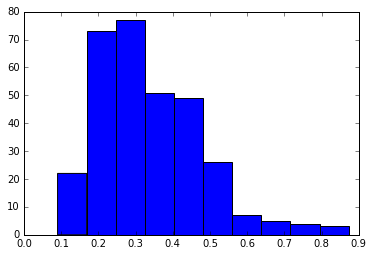

In [262]:
plt.hist(z6_galaxies_mstar.ix[protoclusters_20][(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'] > 1)]['max_fraction_20'])

/home/chris/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


(array([  1.,   0.,   1.,   4.,   5.,  11.,   9.,  13.,   2.,   2.]),
 array([ 13.79993986,  13.95716928,  14.1143987 ,  14.27162812,
         14.42885754,  14.58608696,  14.74331638,  14.9005458 ,
         15.05777522,  15.21500465,  15.37223407]),
 <a list of 10 Patch objects>)

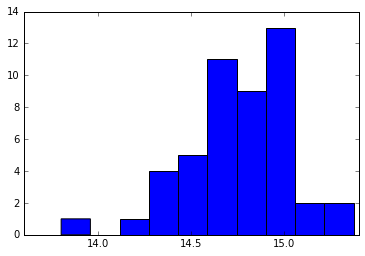

In [156]:
plt.hist(np.log10(z6_galaxies_mstar.ix[protoclusters_20][(z6_galaxies_mstar['max_fraction_20'] > 0.5) \
                                       ]['max_fraction_mass_20'] * 1e10))

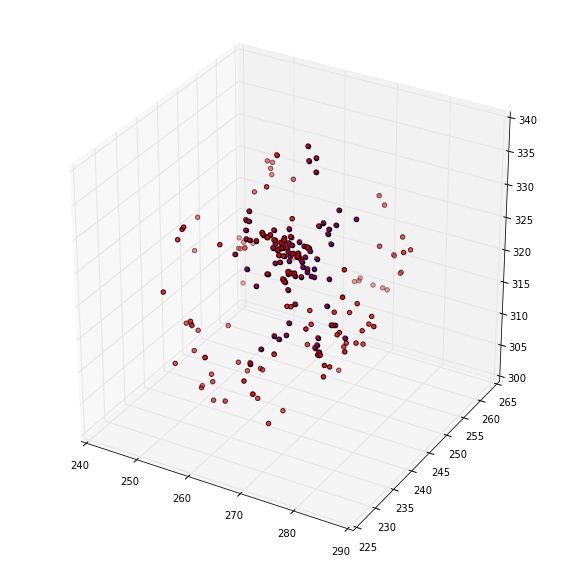

In [177]:
i = 20

match = np.array(pc_members_20)[np.array((z6_galaxies_mstar.ix[protoclusters_20].max_fraction_20 > 0.5).reset_index()['max_fraction_20'] \
    & (z6_galaxies_mstar.ix[protoclusters_20].max_fraction_mass_20 > 1e4).reset_index()['max_fraction_mass_20'])][i][0]

biggest_halo = Counter(z6_galaxies_mstar.ix[match]['z0_haloId']).most_common(1)[0][0]

# plot protocluster and selection
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(z6_galaxies_mstar.ix[match]['z6_x'],
           z6_galaxies_mstar.ix[match]['z6_y'],
           zs=z6_galaxies_mstar.ix[match]['z6_z'], depthshade=True, c='red')

ax.scatter(dat_z0top[(dat_z0top['z0_firstHaloInFOFgroupId'] == biggest_halo) & (dat_z0top['z6_stellarMass'] > 0.1)]['z6_x'],
           dat_z0top[(dat_z0top['z0_firstHaloInFOFgroupId'] == biggest_halo) & (dat_z0top['z6_stellarMass'] > 0.1)]['z6_y'],
           zs=dat_z0top[(dat_z0top['z0_firstHaloInFOFgroupId'] == biggest_halo) & (dat_z0top['z6_stellarMass'] > 0.1)]['z6_z'],
           depthshade=False, c='blue')

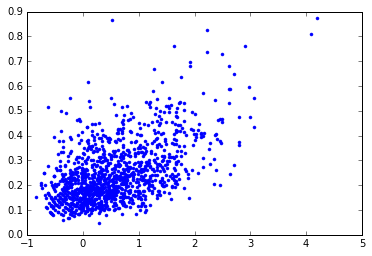

In [184]:
plt.plot(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'], 
         z6_galaxies_mstar.ix[protoclusters_20]['max_fraction_20'], '.')

(array([  60.,  221.,  222.,  115.,   83.,   41.,   11.,    6.,    4.,    4.]),
 array([ 0.04901961,  0.13140371,  0.21378781,  0.29617192,  0.37855602,
         0.46094012,  0.54332422,  0.62570833,  0.70809243,  0.79047653,
         0.87286064]),
 <a list of 10 Patch objects>)

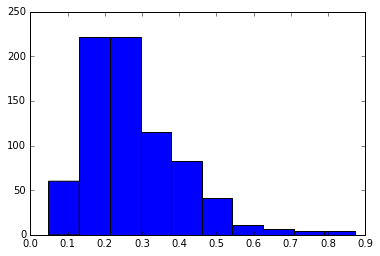

In [181]:
plt.hist(z6_galaxies_mstar.ix[protoclusters_20].reset_index()[(z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'] > 0.25).reset_index()['delta_gal_20']]['max_fraction_20'])

(array([ 176.,  443.,  321.,  153.,  102.,   48.,   13.,    6.,    4.,    4.]),
 array([ 0.04901961,  0.13140371,  0.21378781,  0.29617192,  0.37855602,
         0.46094012,  0.54332422,  0.62570833,  0.70809243,  0.79047653,
         0.87286064]),
 <a list of 10 Patch objects>)

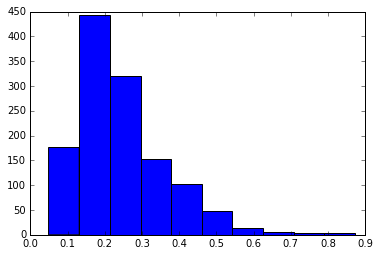

In [176]:
plt.hist(z6_galaxies_mstar.ix[protoclusters_20]['max_fraction_20'])

(array([ 229.,  834.,  689.,  450.,  259.,  163.,   99.,   41.,   20.,   14.]),
 array([ 0.07407407,  0.16528418,  0.25649428,  0.34770439,  0.43891449,
         0.53012459,  0.6213347 ,  0.7125448 ,  0.80375491,  0.89496501,
         0.98617512]),
 <a list of 10 Patch objects>)

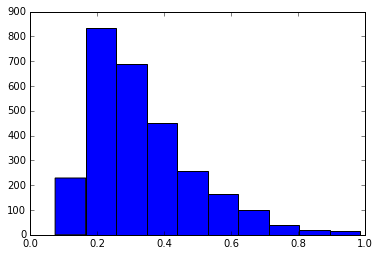

In [163]:
plt.hist(z6_galaxies_mstar.ix[protoclusters_15]['max_fraction_15'])

(array([  189.,   961.,  1539.,  1478.,  1287.,   861.,   697.,   473.,
          339.,   363.]),
 array([ 0.1 ,  0.19,  0.28,  0.37,  0.46,  0.55,  0.64,  0.73,  0.82,
         0.91,  1.  ]),
 <a list of 10 Patch objects>)

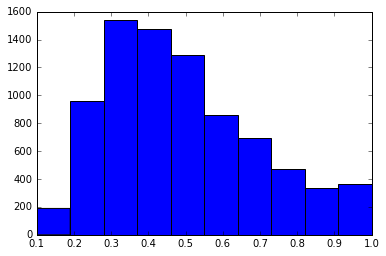

In [164]:
plt.hist(z6_galaxies_mstar.ix[protoclusters_10]['max_fraction_10'])

### Do a match for all clusters

First assign match labels to galaxy dataframe

In [16]:
z6_galaxies_mstar['pc_20'] = ""
z6_galaxies_mstar['pc_15'] = ""
z6_galaxies_mstar['pc_10'] = ""

In [17]:
for i, mems in enumerate(pc_members_20):
    z6_galaxies_mstar.loc[mems[0],'pc_20'] = i
    
for i, mems in enumerate(pc_members_15):
    z6_galaxies_mstar.loc[mems[0],'pc_15'] = i
    
for i, mems in enumerate(pc_members_10):
    z6_galaxies_mstar.loc[mems[0],'pc_10'] = i

Assess match from $z=0$ cluster properties

First, create variables for number of candidates for each cluster, % of galaxies in main candidate, and % of galaxies in no candidate

In [18]:
cluster_num = len(np.unique(dat_z0top[dat_z0top['z0_haloId'] == dat_z0top['z0_firstHaloInFOFgroupId']]['z0_haloId']))

candidate_num_pc20 = [0] * cluster_num
main_candidate_pc20 = [0] * cluster_num
no_candidate_pc20 = [0] * cluster_num

candidate_num_pc15 = [0] * cluster_num
main_candidate_pc15 = [0] * cluster_num
no_candidate_pc15 = [0] * cluster_num

candidate_num_pc10 = [0] * cluster_num
main_candidate_pc10 = [0] * cluster_num
no_candidate_pc10 = [0] * cluster_num

Then loop through each cluster and calculate 

In [19]:
for i, cluster in enumerate(np.unique(dat_z0top[dat_z0top['z0_haloId'] == dat_z0top['z0_firstHaloInFOFgroupId']]['z0_haloId'])):

    c = Counter(z6_galaxies_mstar[z6_galaxies_mstar['z0_centralId'] == cluster]['pc_20'])
    
    candidate_num_pc20[i] = len([value for key, value in c.items() if key not in ['']])
    main_candidate_pc20[i] = float(c.most_common(1)[0][1]) / sum(c.values())
    no_candidate_pc20[i] = float(c['']) / sum(c.values())
    
    c = Counter(z6_galaxies_mstar[z6_galaxies_mstar['z0_centralId'] == cluster]['pc_15'])
    
    candidate_num_pc15[i] = len([value for key, value in c.items() if key not in ['']])
    main_candidate_pc15[i] = float(c.most_common(1)[0][1]) / sum(c.values())
    no_candidate_pc15[i] = float(c['']) / sum(c.values())
    
    c = Counter(z6_galaxies_mstar[z6_galaxies_mstar['z0_centralId'] == cluster]['pc_10'])
    
    candidate_num_pc10[i] = len([value for key, value in c.items() if key not in ['']])
    main_candidate_pc10[i] = float(c.most_common(1)[0][1]) / sum(c.values())
    no_candidate_pc10[i] = float(c['']) / sum(c.values())
    

Number of protocluster candidates for each $z=0$ cluster

(array([   54.,  1536.,   287.,    48.,     9.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5]),
 <a list of 5 Patch objects>)

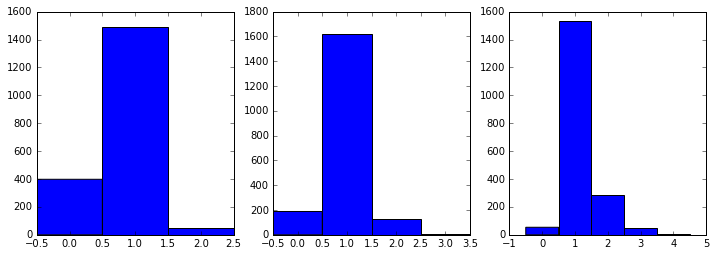

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.hist(candidate_num_pc20, bins=[-0.5,0.5,1.5,2.5])
ax2.hist(candidate_num_pc15, bins=[-0.5,0.5,1.5,2.5,3.5])
ax3.hist(candidate_num_pc10, bins=[-0.5,0.5,1.5,2.5,3.5,4.5])

Fraction of protocluster galaxies in main candidate (the candidate with the most galaxies)

(array([   8.,   33.,   93.,  125.,  145.,  149.,  166.,  258.,  297.,  664.]),
 array([ 0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,  1.        ]),
 <a list of 10 Patch objects>)

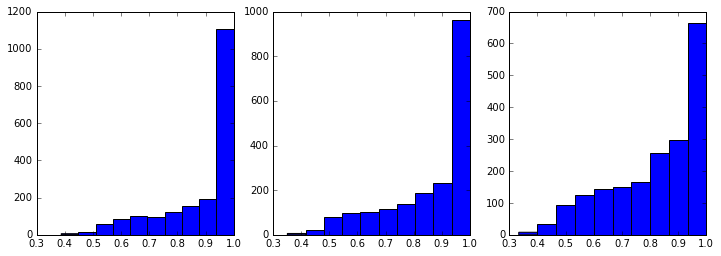

In [341]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.hist(main_candidate_pc20)
ax2.hist(main_candidate_pc15)
ax3.hist(main_candidate_pc10)

Fraction of protocluster galaxies in no candidate

(array([ 761.,  402.,  262.,  171.,  109.,   51.,   55.,   34.,   24.,   69.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

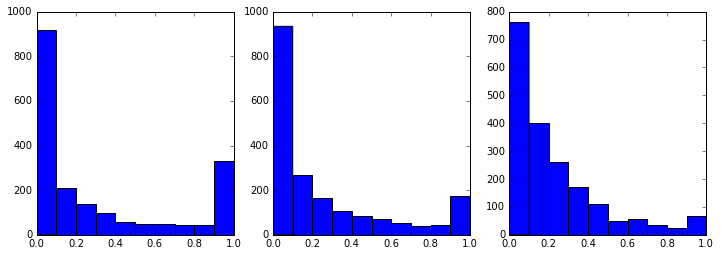

In [348]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))

ax1.hist(no_candidate_pc20)
ax2.hist(no_candidate_pc15)
ax3.hist(no_candidate_pc10)

Now assess match from $z=6$ candidate point of view

First, create the following variables:
- Total Purity (total\_purity\_%r): All cluster galaxies in candidate / total galaxies in candidate
- Largest Purity (largest\_purity\_%r): Highest cluster match number / total galaxies in candidate
- Cluster Purity (cluster\_purity\_%r): Highest cluster match number / number of cluster galaxies
- Total Richness (total\_richness\_%r): Number of halo descendants / number of galaxies
- Cluster Richness (cluster\_richness\_%r): Number of cluster mass halo descendants


In [332]:
total_purity_pc20 = [0] * len(pc_members_20)
largest_purity_pc20 = [0] * len(pc_members_20)
total_richness_pc20 = [0] * len(pc_members_20)
cluster_richness_pc20 = [0] * len(pc_members_20)
cluster_purity_pc20 = [0] * len(pc_members_20)

total_purity_pc15 = [0] * len(pc_members_15)
largest_purity_pc15 = [0] * len(pc_members_15)
total_richness_pc15 = [0] * len(pc_members_15)
cluster_richness_pc15 = [0] * len(pc_members_15)
cluster_purity_pc15 = [0] * len(pc_members_15)

total_purity_pc10 = [0] * len(pc_members_10)
largest_purity_pc10 = [0] * len(pc_members_10)
total_richness_pc10 = [0] * len(pc_members_10)
cluster_richness_pc10 = [0] * len(pc_members_10)
cluster_purity_pc10 = [0] * len(pc_members_10)

In [354]:
for i, mems in enumerate(pc_members_20):
    
    c = Counter(z6_galaxies_mstar[z6_galaxies_mstar['pc_20'] == i]['z0_centralMvir'])

    total_purity_pc20[i] = float(sum([value for key, value in c.items() if key > 1e4])) / sum(c.values())
    total_richness_pc20[i] = len(c)
    cluster_richness_pc20[i] = len([value for key, value in c.items() if key > 1e4])
    largest_purity_pc20[i] = float(max([value for key, value in c.items() if key > 1e4] or [0])) / sum(c.values())
    
    if not [value for key, value in c.items() if key > 1e4]:
        cluster_purity_pc20[i] = 0
    else:
        cluster_purity_pc20[i] = float(max([value for key, value in c.items() if key > 1e4] or [0])) / sum([value for key, value in c.items() if key > 1e4])


In [355]:
for i, mems in enumerate(pc_members_15):
    
    c = Counter(z6_galaxies_mstar[z6_galaxies_mstar['pc_15'] == i]['z0_centralMvir'])

    total_purity_pc15[i] = float(sum([value for key, value in c.items() if key > 1e4])) / sum(c.values())
    total_richness_pc15[i] = len(c)
    cluster_richness_pc15[i] = len([value for key, value in c.items() if key > 1e4])
    largest_purity_pc15[i] = float(max([value for key, value in c.items() if key > 1e4] or [0])) / sum(c.values())
    
    if not [value for key, value in c.items() if key > 1e4]:
        cluster_purity_pc15[i] = 0
    else:
        cluster_purity_pc15[i] = float(max([value for key, value in c.items() if key > 1e4] or [0])) / sum([value for key, value in c.items() if key > 1e4])


In [356]:
for i, mems in enumerate(pc_members_10):
    
    c = Counter(z6_galaxies_mstar[z6_galaxies_mstar['pc_10'] == i]['z0_centralMvir'])

    total_purity_pc10[i] = float(sum([value for key, value in c.items() if key > 1e4])) / sum(c.values())
    total_richness_pc10[i] = len(c)
    cluster_richness_pc10[i] = len([value for key, value in c.items() if key > 1e4])
    largest_purity_pc10[i] = float(max([value for key, value in c.items() if key > 1e4] or [0])) / sum(c.values())
    
    if not [value for key, value in c.items() if key > 1e4]:
        cluster_purity_pc10[i] = 0
    else:
        cluster_purity_pc10[i] = float(max([value for key, value in c.items() if key > 1e4] or [0])) / sum([value for key, value in c.items() if key > 1e4])


All cluster galaxies in candidate / total galaxies in candidate

In [364]:
z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'].shape

len(list(compress(total_purity_pc20,overdense_20)))

964

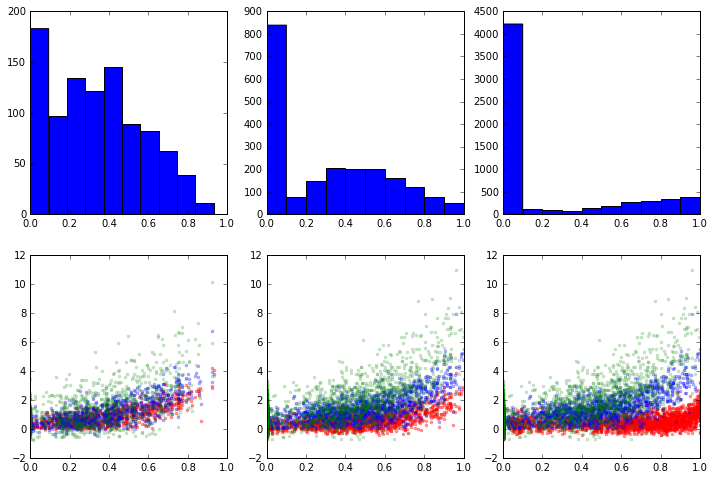

In [381]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(12,8))

ax1.hist(total_purity_pc20)
ax2.hist(total_purity_pc15)
ax3.hist(total_purity_pc10)

ax4.plot(total_purity_pc20, z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'], '.', alpha=0.4, c='red')
ax4.plot(total_purity_pc20, z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_15'], '.', alpha=0.3, c='blue')
ax4.plot(total_purity_pc20, z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_10'], '.', alpha=0.2, c='green')

ax5.plot(total_purity_pc15, z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_20'], '.', alpha=0.4, c='red')
ax5.plot(total_purity_pc15, z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'], '.', alpha=0.3, c='blue')
ax5.plot(total_purity_pc15, z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_10'], '.', alpha=0.2, c='green')

ax6.plot(total_purity_pc10, z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_20'], '.', alpha=0.4, c='red')
ax6.plot(total_purity_pc10, z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_15'], '.', alpha=0.3, c='blue')
ax6.plot(total_purity_pc10, z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'], '.', alpha=0.2, c='green')

Number of cluster mass halo descendants

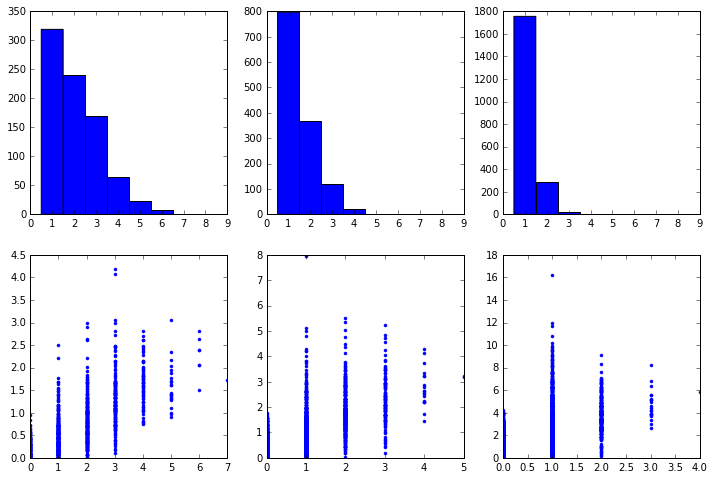

In [370]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(12,8))

ax1.hist(cluster_richness_pc20, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5])
ax2.hist(cluster_richness_pc15, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5])
ax3.hist(cluster_richness_pc10, bins=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5])

ax4.plot(cluster_richness_pc20, z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'], '.')
ax5.plot(cluster_richness_pc15, z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'], '.')
ax6.plot(cluster_richness_pc10, z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'], '.')

Highest cluster match number / total galaxies in candidate

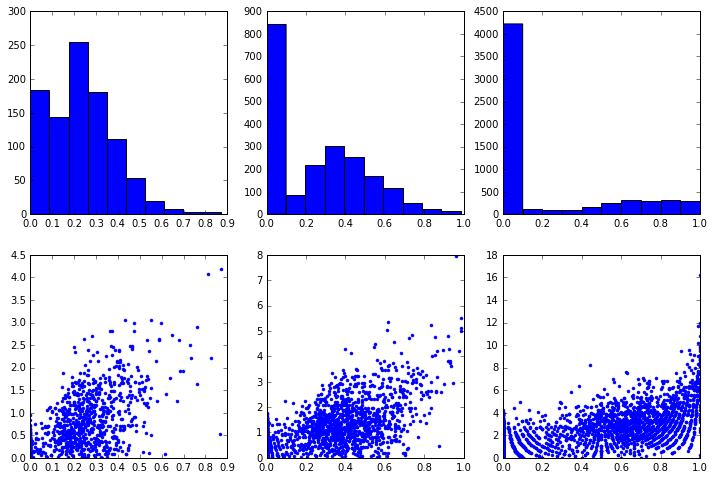

In [373]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(12,8))

ax1.hist(largest_purity_pc20)
ax2.hist(largest_purity_pc15)
ax3.hist(largest_purity_pc10)

ax4.plot(largest_purity_pc20, z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'], '.')
ax5.plot(largest_purity_pc15, z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'], '.')
ax6.plot(largest_purity_pc10, z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'], '.')

Highest cluster match number / number of cluster galaxies

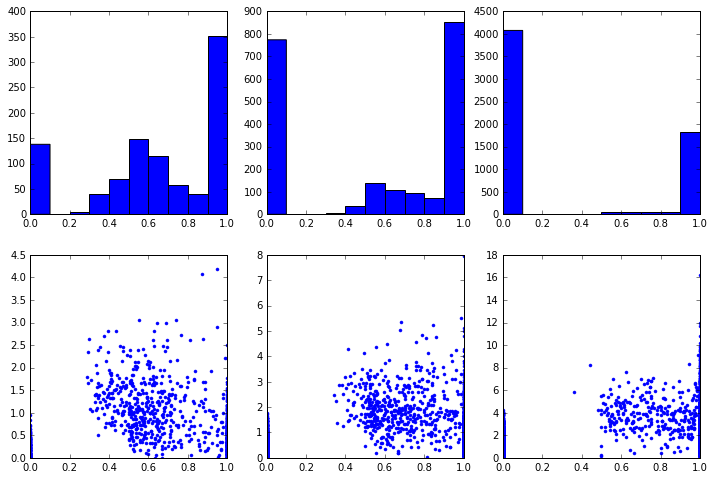

In [374]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(12,8))

ax1.hist(cluster_purity_pc20)
ax2.hist(cluster_purity_pc15)
ax3.hist(cluster_purity_pc10)

ax4.plot(cluster_purity_pc20, z6_galaxies_mstar.ix[protoclusters_20]['delta_gal_20'], '.')
ax5.plot(cluster_purity_pc15, z6_galaxies_mstar.ix[protoclusters_15]['delta_gal_15'], '.')
ax6.plot(cluster_purity_pc10, z6_galaxies_mstar.ix[protoclusters_10]['delta_gal_10'], '.')

## Mean Shift clustering

In [366]:
estimator = MeanShift(bandwidth=20, n_jobs=-2) # use n-1 cores

N = 2000

estimator.fit(z6_galaxies_mstar[:N][['z6_x','z6_y','z6_z']])

print np.unique(estimator.labels_).shape

(40,)


Counter({0: 124,
         1: 143,
         2: 164,
         3: 125,
         4: 63,
         5: 72,
         6: 66,
         7: 121,
         8: 82,
         9: 95,
         10: 72,
         11: 81,
         12: 80,
         13: 59,
         14: 59,
         15: 41,
         16: 49,
         17: 50,
         18: 41,
         19: 51,
         20: 44,
         21: 41,
         22: 57,
         23: 42,
         24: 28,
         25: 18,
         26: 25,
         27: 20,
         28: 17,
         29: 11,
         30: 13,
         31: 12,
         32: 10,
         33: 5,
         34: 4,
         35: 6,
         36: 4,
         37: 2,
         38: 2,
         39: 1})

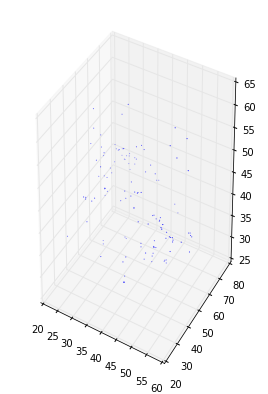

In [372]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(121, projection='3d')

i = 3

ax.scatter(z6_galaxies_mstar[:N][estimator.labels_ == i]['z6_x'],
           z6_galaxies_mstar[:N][estimator.labels_ == i]['z6_y'],
           zs=z6_galaxies_mstar[:N][estimator.labels_ == i]['z6_z'],
           s=5, marker='.', edgecolor='')
           #c=estimator.labels_, )

ax.set_aspect('equal')